In [20]:
from astroquery.mast import Observations
import os
import shutil
import subprocess
from drizzlepac import astrodrizzle
import glob
from stsci.tools import teal
from drizzlepac import tweakreg
from stwcs import updatewcs
from astropy.io import fits
import jwst.assign_wcs as wcs
import matplotlib.pyplot as mplplot

In [2]:
astrodrizzle.help()


astrodrizzle Version 3.1.6  updated on  2020-02-19 16:16:30 -0500

Parameters
----------
input : str or list of str (Default = ``'*flt.fits'``)
    The name or names of the input files to be processed, which can be
    provided in any of the following forms:

      * filename of a single image
      * filename of an association (``ASN``) table
      * wild-card specification for files in directory
      * comma-separated list of filenames
      * ``@file`` filelist containing list of desired input filenames.
        The file list needs to be provided as an ASCII text file containing
        a list of filenames for all input images with one filename on each line
        of the file. If inverse variance maps (``IVM`` maps) have also been
        created by the user and are to be used (by specifying ``'IVM'`` to the
        parameter ``final_wht_type``), then these are simply provided as a
        second column in the filelist, with each ``IVM`` filename listed on the
        same line a

In [3]:
frameFitsDir = "/Users/zx446701/OneDrive - The Open University/Ice_Age/Fengwu Data/ver1_F322W2_frames"
# There is a value in Image header that tells you subpixel number etc

subpixelframes = ['/Users/zx446701/OneDrive - The Open University/Ice_Age/Fengwu Data/ver1_F322W2_frames/jw01309006001_01101_00001_nrca5_rate_wcs.fits','/Users/zx446701/OneDrive - The Open University/Ice_Age/Fengwu Data/ver1_F322W2_frames/jw01309006001_01101_00002_nrca5_rate_wcs.fits','/Users/zx446701/OneDrive - The Open University/Ice_Age/Fengwu Data/ver1_F322W2_frames/jw01309006001_01101_00003_nrca5_rate_wcs.fits','/Users/zx446701/OneDrive - The Open University/Ice_Age/Fengwu Data/ver1_F322W2_frames/jw01309006001_01101_00004_nrca5_rate_wcs.fits']

# subpixelA = dict()

# for i in range(0,4):
#     subpixelA[i] = f"/Users/zx446701/OneDrive - The Open University/Ice_Age/Fengwu Data/ver1_F322W2_frames/jw01309006001_01101_0000{i+1}_nrca5_rate_wcs.fits"


XTENSION= 'IMAGE   '           / Image extension                                
BITPIX  =                  -32 / array data type                                
NAXIS   =                    2 / number of array dimensions                     
NAXIS1  =                 2048                                                  
NAXIS2  =                 2048                                                  
PCOUNT  =                    0 / number of parameters                           
GCOUNT  =                    1 / number of groups                               
EXTNAME = 'ERR     '           / extension name                                 
BUNIT   = 'DN/s    '           / physical units of the array values             
EXTVER  =                    1 / extension value                                


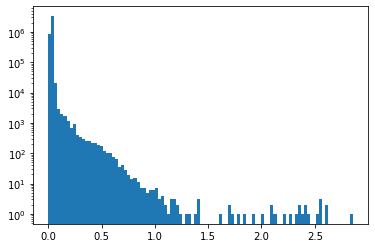

In [24]:
# Add EXPTIME to Header
fits_image_filename = subpixelframes[0]
hdul = fits.open(fits_image_filename)  # open a FITS file
hdul[0].header['EXPTIME'] = hdul[0].header['EFFEXPTM']
print(repr(hdul[2].header))

mplplot.hist(hdul[2].data.flatten(),bins=100)
mplplot.yscale('log')

fits_image_filename2 = subpixelframes[1]
hdul2 = fits.open(fits_image_filename2)  # open a FITS file
hdul2[0].header['EXPTIME'] = hdul2[0].header['EFFEXPTM']

fits_image_filename3 = subpixelframes[2]
hdul3 = fits.open(fits_image_filename3)  # open a FITS file
hdul3[0].header['EXPTIME'] = hdul3[0].header['EFFEXPTM']

fits_image_filename4 = subpixelframes[3]
hdul4 = fits.open(fits_image_filename4)  # open a FITS file
hdul4[0].header['EXPTIME'] = hdul4[0].header['EFFEXPTM']

hdul_list = []

### TweakReg required to align WCS of images

In [ ]:
astrodrizzle.AstroDrizzle(input=subpixelframes,
                          output='F322W2_R_subpix1_modA',
                          build=True,
                          preserve=False,
                          mdriztab=False,)